# **YC Entrepreneurs/Top Companies EDA 📊**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [ ]:
badges_df = pd.read_csv('/content/badges.csv')
companies_df = pd.read_csv('/content/companies.csv')
founders_df = pd.read_csv('/content/founders.csv')
industries_df = pd.read_csv('/content/industries.csv')
prior_companies_df = pd.read_csv('/content/prior_companies.csv')
regions_df = pd.read_csv('/content/regions.csv')
schools_df = pd.read_csv('/content/schools.csv')
tags_df = pd.read_csv('/content/tags.csv')

In [ ]:
print('founders df: ', founders_df.shape), print('schools df: ', schools_df.shape), print('companies df: ', companies_df.shape),
print('badges_df: ', badges_df.shape), print('industries df: ', industries_df.shape), print('prior_companies df: ', prior_companies_df.shape),
print('tags df: ', tags_df.shape), print('regions df: ', regions_df.shape)

founders df:  (8465, 8)
schools df:  (55348, 4)
companies df:  (4844, 12)
badges_df:  (2641, 3)
industries df:  (8838, 3)
prior_companies df:  (32612, 2)
tags df:  (12969, 3)
regions df:  (4844, 5)


(None, None)

In [ ]:
all_included = schools_df['hnid'].isin(founders_df['hnid']).all()

if all_included:
    print("All IDs from 'schools_df' are present in 'founders_df'.")
else:
    print("Not all IDs from 'schools_df' are present in 'founders_df'.")

All IDs from 'schools_df' are present in 'founders_df'.


All IDs from 'schools_df' are present in 'founders_df'.


In [ ]:
founders_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   first_name       8461 non-null   object
 1   last_name        8456 non-null   object
 2   hnid             8465 non-null   object
 3   avatar_thumb     8465 non-null   object
 4   current_company  7624 non-null   object
 5   current_title    2201 non-null   object
 6   company_slug     8465 non-null   object
 7   top_company      8465 non-null   bool  
dtypes: bool(1), object(7)
memory usage: 471.3+ KB


# **1 -  Educational Backgrounds Analysis: Career trajectories of Y Combinator founders.**

I will explore the distribution of educational institutions, analyze the years of study, and investigate the correlation between education and startup success. Key visualizations will illustrate the findings to provide a clearer understanding of the data trends and patterns.

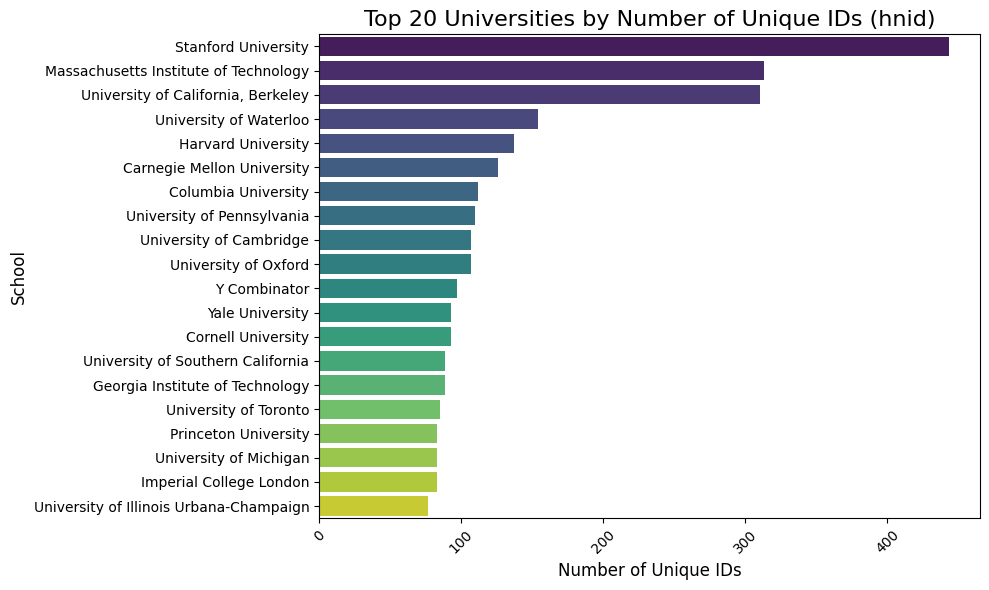

In [ ]:
# Removing rows without a 'field_of_study'
schools_df = schools_df[~schools_df['field_of_study'].isna()]

# Removing rows related to high schools, focusing only on undergraduate and higher education
# This step ensures that most relevant education levels are analyzed
schools_df = schools_df[~schools_df['field_of_study'].str.contains('High school|Highschool', case=False, na=False)]

unique_schools = schools_df.drop_duplicates(subset=['hnid', 'school'])

total_school_counts = unique_schools['school'].value_counts().reset_index(name='count')

total_school_counts.columns = ['school', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(data=total_school_counts.head(20), x='count', y='school', palette='viridis')

plt.title('Top 20 Universities by Number of Unique IDs (hnid)', fontsize=16)
plt.xlabel('Number of Unique IDs', fontsize=12)
plt.ylabel('School', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Consolidating all educational fields and universities attended by each 'hnid'. The total study years are approximated by counting entries for each person, with the assumption that each unique entry reflects one year of study. This allows us to visualize patterns of education in different institutions across multiple individuals.

In [ ]:
# Correcting "University of California, Berkeley" string. It's the only one with "," that I need to correct since it's top 3 within YC
schools_df['school'] = schools_df['school'].str.replace(r'(University of California),\s*(Berkeley)', r'\1 \2', regex=True)

# Grouping the fields of study by 'hnid' (unique identifier for individuals)
# and calculating the total years based on the number of study fields (assuming one entry per year)
grouped_years = (
    schools_df.groupby('hnid').agg(
        field_of_study=('field_of_study', lambda x: ', '.join(map(str, x.dropna().unique()))),
        university= ('school', lambda x: ', '.join(map(str, x.dropna().unique()))),
        total_years=('field_of_study', 'size')  # Sum the total years (count)
    ).reset_index()
)


Analyzing the fields of study of YC founders by concatenating all subjects into a single list and counting their occurrences. After that, visualizing the top 10 courses associated with YC founders in a bar chart, allowing us to see the most popular educational backgrounds within the YC community. This insight could help understand the diverse educational pathways that lead to entrepreneurship.

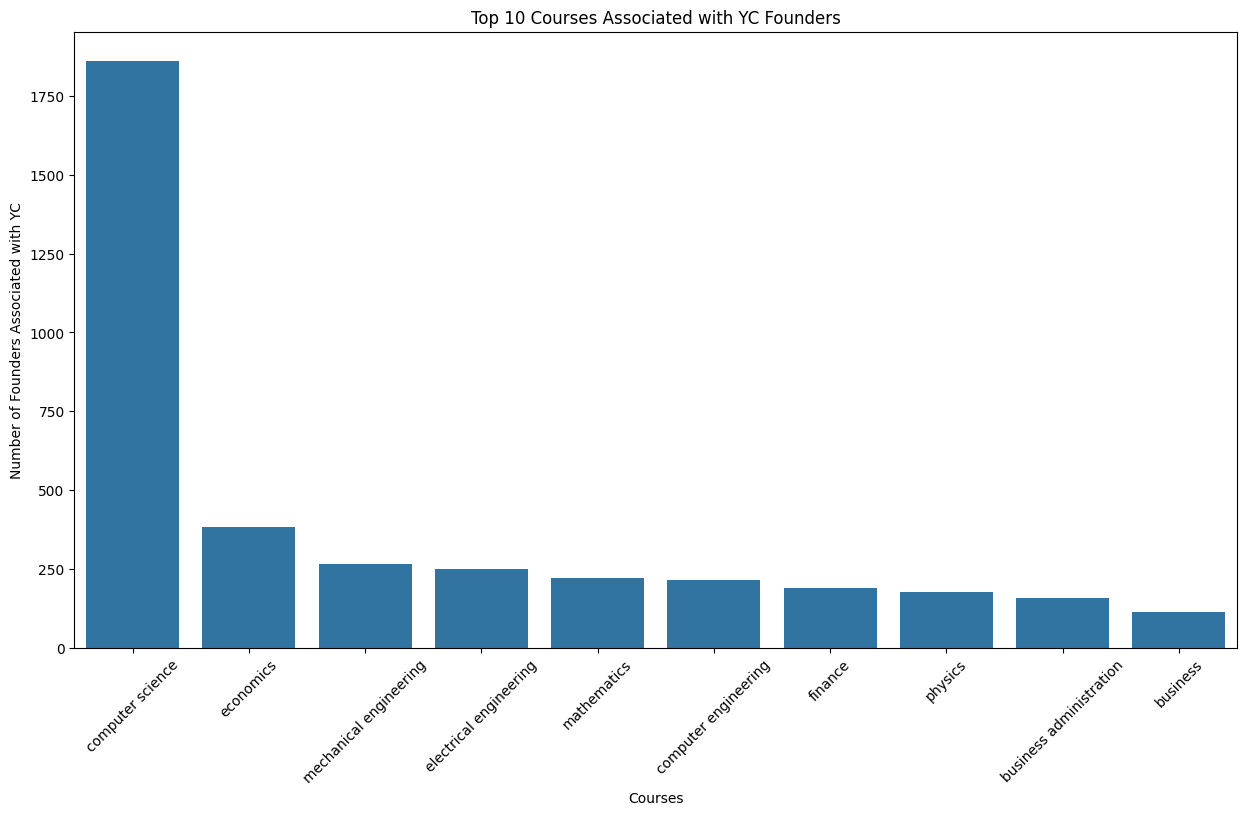

In [ ]:
all_subjects = grouped_years['field_of_study'].str.cat(sep=', ').split(', ')

# Count the occurrences of each subject
word_counts = Counter(subject.strip().lower() for subject in all_subjects)

word_counts_df = pd.DataFrame(word_counts.items(), columns=['subject', 'count'])
word_counts_df = word_counts_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='subject', y='count', data=word_counts_df.head(10))

# Organizing the graphic
plt.title('Top 10 Courses Associated with YC Founders')
plt.xlabel('Courses')
plt.ylabel('Number of Founders Associated with YC')
plt.xticks(rotation=45)
plt.show()



This boxplot visualizes the educational background and professional experience of YC founders. The first boxplot represents the total years of study, while the second illustrates the number of companies each founder has worked for, excluding their current company. These visualizations provide insights into the academic and professional trajectories of founders associated with YC.

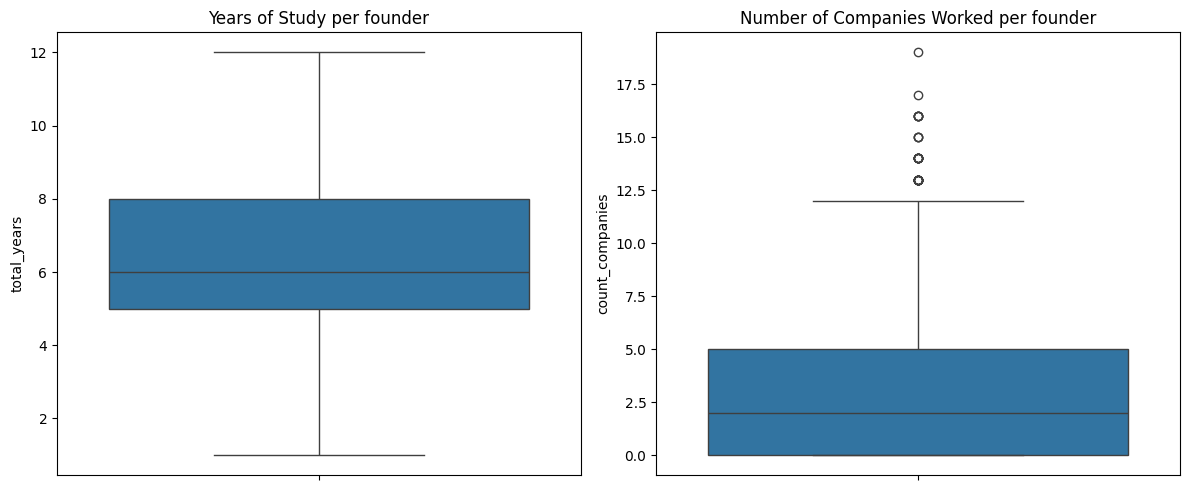

In [ ]:
company_counts = (prior_companies_df.groupby('hnid').size() - 1).reset_index(name='count_companies')  # Founders already work for their company (-1 in the end)

# Ploting side by side (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=grouped_years['total_years'], ax=axes[0], showfliers=False)  # Fliers removed, no need for this graphic
axes[0].set_title("Years of Study per founder")

sns.boxplot(y=company_counts['count_companies'], ax=axes[1])
axes[1].set_title("Number of Companies Worked per founder")

plt.tight_layout()
plt.show()

- Cleaning and preparing multiple DataFrames by dropping unnecessary columns and handling missing values (Basically treating the dataframes).
- Merging relevant data on specified keys to create a comprehensive dataset.
- Transforming 'batch' is period that they joined YC, for example: S01: Summer, 2001 - W23: Winter 2023. This way we can see a time difference between the founders/companies
- Unnecessary rows and columns are filtered out to refine the dataset.

In [ ]:
# Remove unnecessary columns from the DataFrames
tags_df = tags_df.drop(columns='Unnamed: 0')
regions_df = regions_df.drop(columns='Unnamed: 0')
companies_df = companies_df.drop(columns='Unnamed: 0')

# Create a full name column in the founders DataFrame (Just for personal curiosity - this column will not be used)
founders_df['full_name'] = founders_df['first_name'] + " " + founders_df['last_name']

# Merging 'hnid' Dataframes
df = founders_df.merge(grouped_years, on='hnid', how='outer')
df = df.merge(company_counts, on='hnid', how='outer')

df.rename(columns={'company_slug': 'slug'}, inplace=True)

df['university'][df['university'].isna()] = "Not informed"

df = df.drop(columns=['first_name', 'last_name', 'avatar_thumb', 'current_title'], axis=0)

# Aggregate tags by 'id' and join them into a single string
tags_df = tags_df.groupby('id').agg(
        tags=('tag', lambda x: ', '.join(map(str, x.dropna().unique())))).reset_index()

# Merging 'ID' Dataframes to "company_slug"
df = df.merge(companies_df, on='slug', how='outer')
df = df.merge(regions_df, on='id', how='outer')
df = df.merge(tags_df, on='id', how='outer')

df.columns

df = df.drop(columns=['website', 'smallLogoUrl', 'longDescription', 'url', 'address'], axis=0)

df = df[~df['hnid'].isna()]
df = df[~df['id'].isna()]

# Converting 'batch' (YC group related to when founders joined)
def convert_batch(batch):
    year = '20' + batch[1:]
    semester = '1' if batch[0] == 'S' else '2'
    return f"{year}/{semester}"

df['formatted_batch'] = df['batch'].apply(convert_batch)

Exploring the number of startups launched in each season at YC over time. By aggregating the data based on the formatted_batch, we can visualize the startup activity across different semesters. The boxplot generated provides insights into trends and variations in startup formation, potentially highlighting periods of heightened entrepreneurial interest. This analysis is crucial for understanding the dynamics of startup ecosystems and can guide future founders in identifying favorable conditions for launching their ventures.

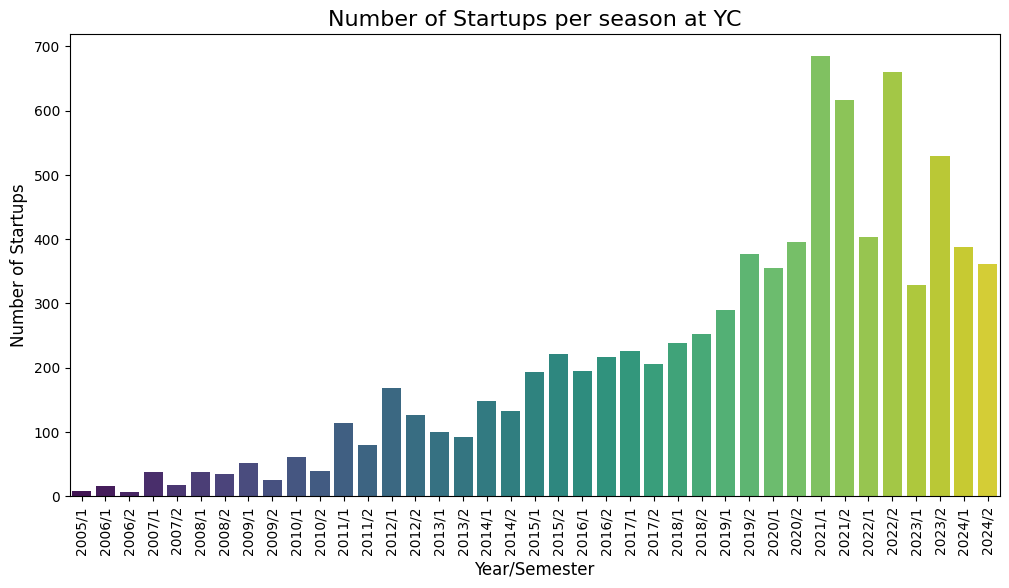

In [ ]:
# First, we group the data by 'formatted_batch' and count the number of startups per semester
batch_counts = df['formatted_batch'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=batch_counts.index, y=batch_counts.values, palette="viridis")

plt.title('Number of Startups per season at YC', fontsize=16)
plt.xlabel('Year/Semester', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)
plt.xticks(rotation=90)

plt.show()

Exploring the relationship between the year and semester of batches and the number of companies worked by founders at companies. The visualizations will help identify trends and patterns over the last decade.

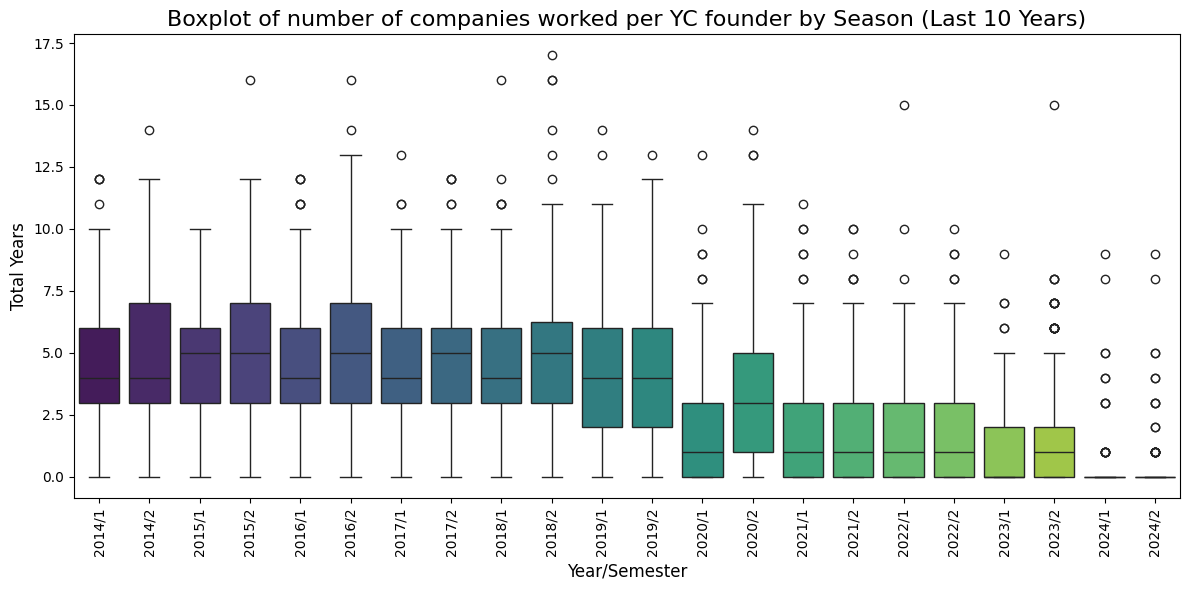

In [ ]:
df['year'] = df['formatted_batch'].str[:4].astype(int)
df['season'] = df['formatted_batch'].str[-1].astype(int)  # Extracts the last digit (1 for summer, 2 for winter)
df['year_season'] = df['year'] + (df['season'] - 1) * 0.5  # Converts to values like 2024.0 (summer) and 2024.5 (winter)

# Getting only last 10 years, that can be changeble
last_10_years = df[df['year'] >= (df['year'].max() - 10)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='formatted_batch', y='count_companies', data=last_10_years.sort_values(by='year_season'), palette="viridis")

plt.title('Boxplot of number of companies worked per YC founder by Season (Last 10 Years)', fontsize=16)
plt.xlabel('Year/Semester', fontsize=12)
plt.ylabel('Total Years', fontsize=12)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Same code as above, however the idea here is to observe total years of study over last 10 years.



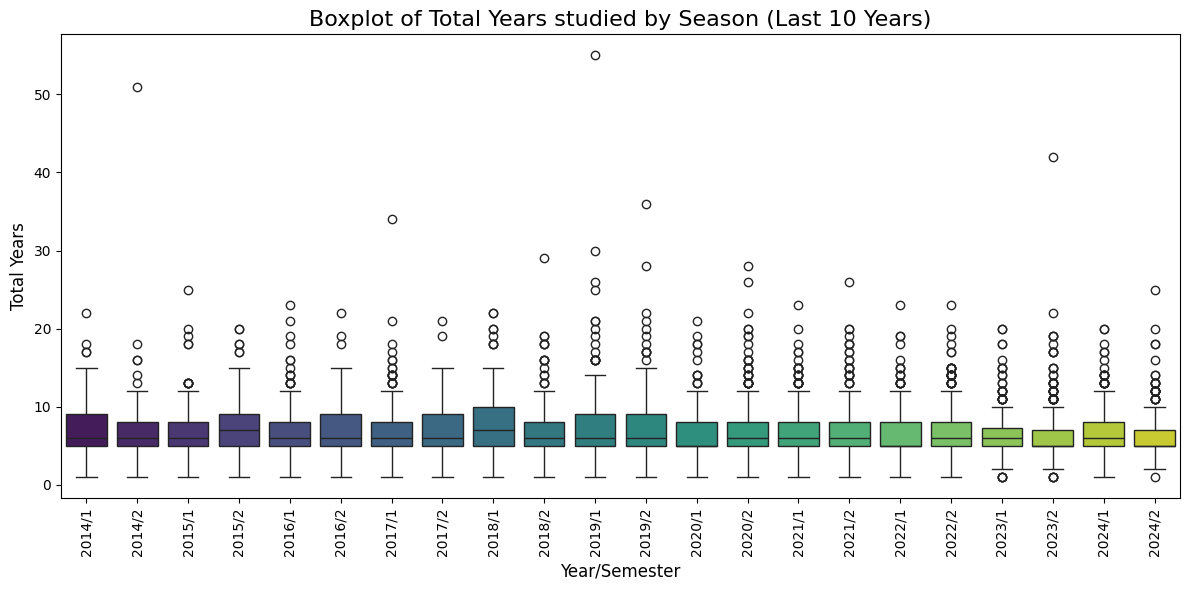

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='formatted_batch', y='total_years', data=last_10_years.sort_values(by='year_season'), palette="viridis")

plt.title('Boxplot of Total Years studied by Season (Last 10 Years)', fontsize=16)
plt.xlabel('Year/Semester', fontsize=12)
plt.ylabel('Total Years', fontsize=12)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()




Now we filter and analyze universities associated with founders, focusing on identifying the top three universities by country. This analysis helps to understand the educational backgrounds of the founders involved with Y Combinator startups. I filtered only the countries that have more than 2 universities at top 3 count to make a better analyzes. Also it's possible to notice, that there are countries that have universities from other country, these cases are people who studied (MBA, undergraduate, others) abroad.

Do you see the university you attended or attend?

In [ ]:
# Removing founder that didn't inform ou didn't attend an university
universities_filtered = df.loc[df['university'] != 'Not informed']

universities_expanded = universities_filtered.assign(university=universities_filtered['university'].str.split(',')).explode('university')

universities_expanded['university'] = universities_expanded['university'].str.strip()

# Group by country and university, counting occurrences
top_universities = universities_expanded.groupby(['country', 'university']).size().reset_index(name='count')

# Top 3 universities for each country
top_3_universities = top_universities.groupby('country').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

top_3_universities['rank'] = top_3_universities.groupby('country').cumcount() + 1

result = top_3_universities.pivot(index='country', columns='rank', values='university')

result.columns = [f'Top {int(col)} University' for col in result.columns]

count_columns = top_3_universities.pivot(index='country', columns='rank', values='count')
count_columns.columns = [f'Top {int(col)} Count' for col in count_columns.columns]

final_result = pd.concat([result, count_columns], axis=1)

# filtering for countries with at least 2 universities at top 3 count
final_result = pd.DataFrame(final_result)
final_result[final_result['Top 3 Count'] >= 2]

,Top 1 University,Top 2 University,Top 3 University,Top 1 Count,Top 2 Count,Top 3 Count
country,,,,,,
Argentina,Universidad Blas Pascal,Universidad Nacional de Cordoba,ITBA,6.0,3.0,2.0
Australia,Monash University,Sydney,The University of Queensland,2.0,2.0,2.0
Brazil,Insper,Instituto Tecnológico de Aeronáutica,Stanford University,7.0,7.0,6.0
Canada,University of Waterloo,University of Toronto,Queen's University,59.0,29.0,16.0
Chile,Pontificia Universidad Católica de Chile,Universidad de Chile,Universidad Adolfo Ibañez,12.0,6.0,3.0
China,Northwestern Polytechnical University,Tsinghua University,The Chinese University of Hong Kong,3.0,3.0,2.0
Colombia,Universidad de Los Andes,Massachusetts Institute of Technology,Pontificia Universidad Javeriana,15.0,3.0,3.0
Denmark,DTU - Technical University of Denmark,University of Copenhagen,Technical University of Denmark,6.0,3.0,2.0
France,Ecole polytechnique,University of California Berkeley,HEC Paris,15.0,10.0,8.0


# **2 - Analysis of Top Companies and Leading Founders in Y Combinator (YC)**

I will analyze various aspects such as industry categorization, years of study, and other relevant metrics.

In [ ]:
df_top = df[df['top_company'] == True]
df_top.head(5)

,hnid,current_company,slug,top_company,full_name,field_of_study,university,total_years,count_companies,id,...,teamSize,batch,status,region,country,tags,formatted_batch,year,season,year_season
5,kennystone,NaN,plangrid,True,Kenny Stone,Computer Engineering,Purdue University,5.0,2.0,8.0,...,355.0,W12,Acquired,America / Canada,United States of America,Construction,2012/2,2012,2,2012.5
44,edawerd,Gusto,gusto,True,Edward Kim,Electrical Engineering,Stanford University,6.0,5.0,24.0,...,2400.0,W12,Active,America / Canada,United States of America,"B2B, Payroll, Health Insurance",2012/2,2012,2,2012.5
45,joshuareeves,Gusto,gusto,True,Josh Reeves,"Bachelor’s Degree Electrical Engineering, Elec...",Stanford University,9.0,0.0,24.0,...,2400.0,W12,Active,America / Canada,United States of America,"B2B, Payroll, Health Insurance",2012/2,2012,2,2012.5
46,londont,Gusto,gusto,True,Tomer London,"Electrical Engineering, Electrical Engineering...","Technion, Stanford University",11.0,6.0,24.0,...,2400.0,W12,Active,America / Canada,United States of America,"B2B, Payroll, Health Insurance",2012/2,2012,2,2012.5
57,gausebeck,Matterport,matterport,True,David Gausebeck,Computer Science,University of Illinois Urbana-Champaign,4.0,1.0,30.0,...,201.0,W12,Public,America / Canada,United States of America,Computer Vision,2012/2,2012,2,2012.5



Visualizing the educational background and professional experience of YC founders that got listed as top companies. First boxplot represents the total years of study, while the second illustrates the number of companies each founder has worked for, excluding their current company. These visualizations provide insights into the academic and professional trajectories of founders associated with YC.

Comparing these boxplots with the one just about founders that joined YC, they are pretty similar, however if we look deeper into the years worked in companies, we can notice that top companies founders worked more years than YC founders that are not Top companies founders

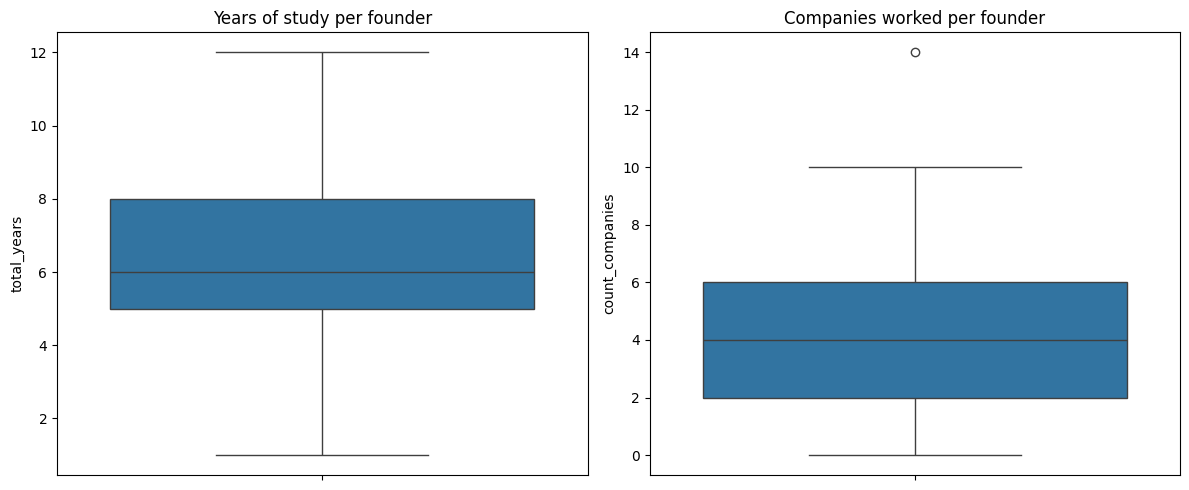

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=df_top['total_years'], ax=axes[0], showfliers=False)
axes[0].set_title("Years of study per founder")

sns.boxplot(y=df_top['count_companies'], ax=axes[1])
axes[1].set_title("Companies worked per founder")

plt.tight_layout()
plt.show()

Distribution in more cleared way of total years of study related to YC founders from top companies



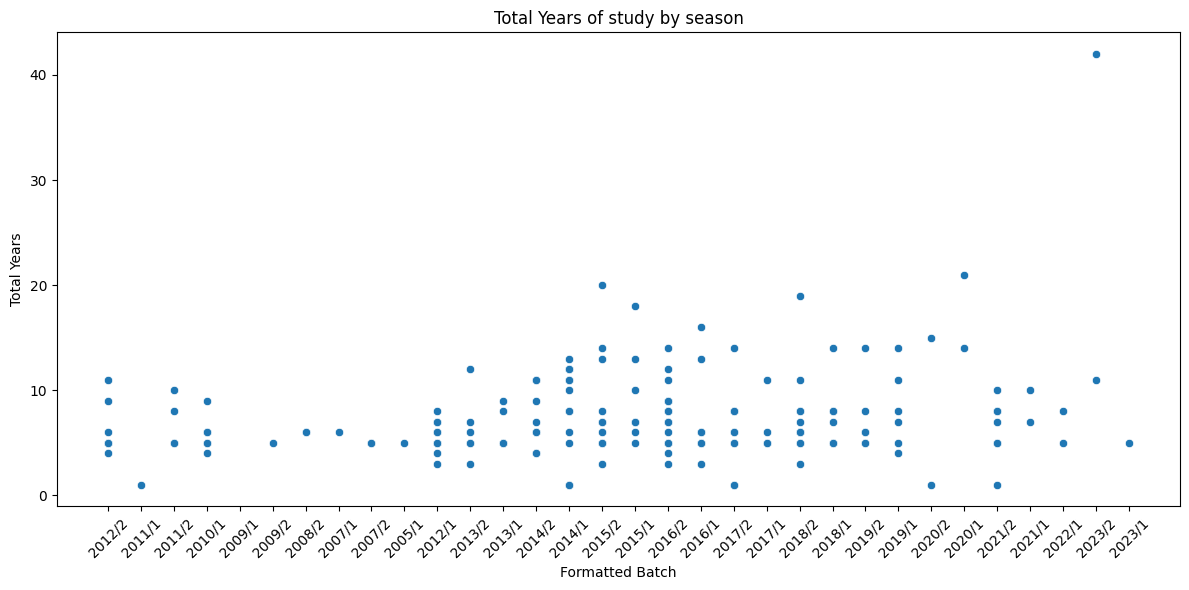

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='formatted_batch', y='total_years', data=df_top)

plt.xticks(rotation=45)
plt.title('Total Years of study by season')
plt.xlabel('Formatted Batch')
plt.ylabel('Total Years')

plt.tight_layout()
plt.show()

Distribution in more cleared way of total companies worked related to YC founders from top companies



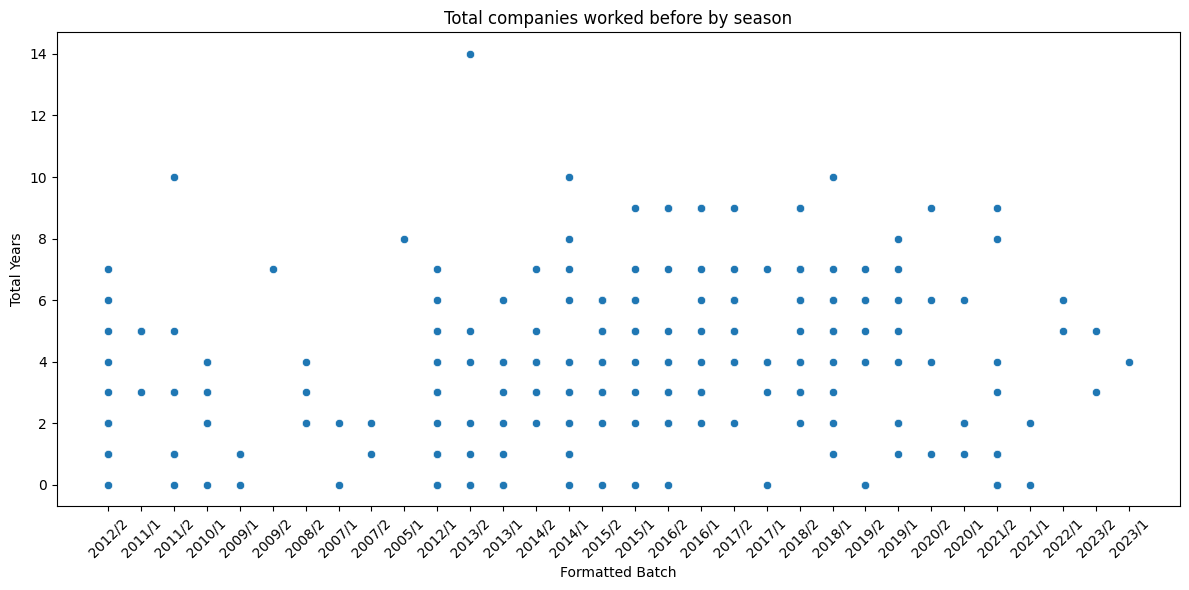

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='formatted_batch', y='count_companies', data=df_top)

plt.xticks(rotation=45)
plt.title('Total companies worked before by season')
plt.xlabel('Formatted Batch')
plt.ylabel('Total Years')

plt.tight_layout()
plt.show()

Number of top companies that appeared in each season of YC



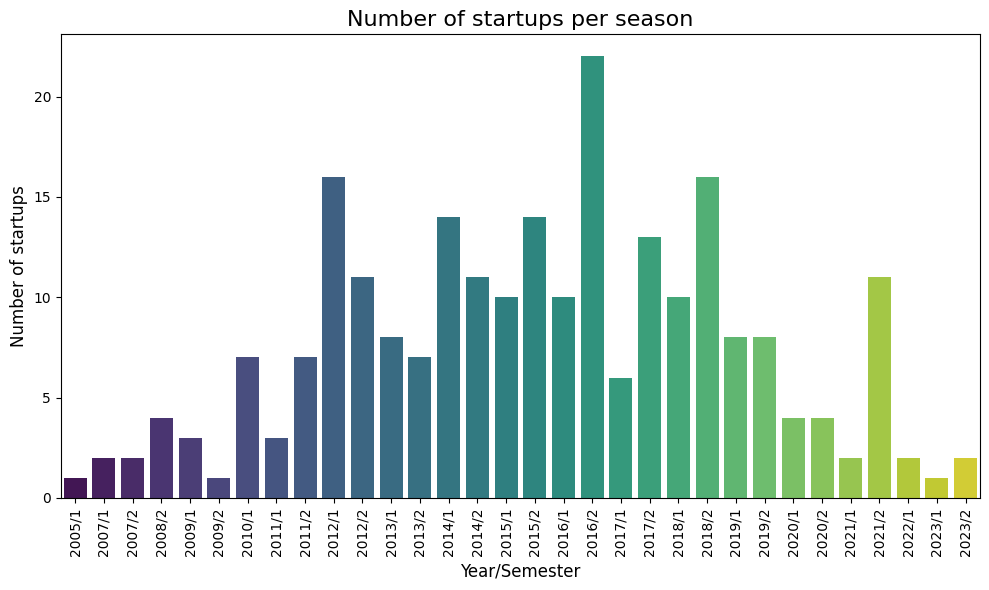

In [ ]:
top_batch_counts = df_top['formatted_batch'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.barplot(x=top_batch_counts.index, y=top_batch_counts.values, palette="viridis")

plt.title('Number of startups per season', fontsize=16)
plt.xlabel('Year/Semester', fontsize=12)
plt.ylabel('Number of startups', fontsize=12)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


Plotting the number of companies that became "Top companies" inside YC and comparing with all number of companies inside YC per season

<Figure size 1200x600 with 0 Axes>

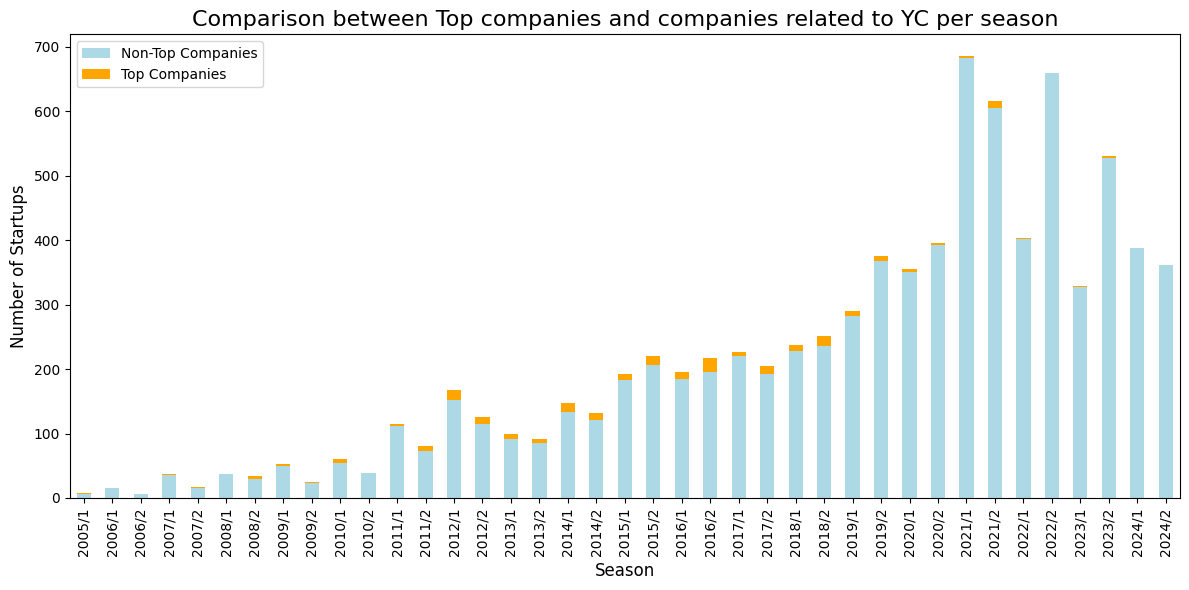

In [ ]:
aligned_top_batch_counts = top_batch_counts.reindex(batch_counts.index, fill_value=0)

stacked_data = pd.DataFrame({
    'Total Startups': batch_counts,
    'Top Companies': aligned_top_batch_counts
})

# Calculate the 'Non-Top Companies' by subtracting top companies from total startups
stacked_data['Non-Top Companies'] = stacked_data['Total Startups'] - stacked_data['Top Companies']

plt.figure(figsize=(12, 6))
stacked_data[['Non-Top Companies', 'Top Companies']].plot(kind='bar', stacked=True, figsize=(12, 6), color=['lightblue', 'orange'])

plt.title('Comparison between Top companies and companies related to YC per season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


Analyzing the fields of study of YC founders from "Top Companies". It's pretty much YC founders profile we can notice that Computer Science is the course most highlighted as a response from the advance in tech companies in nowadays

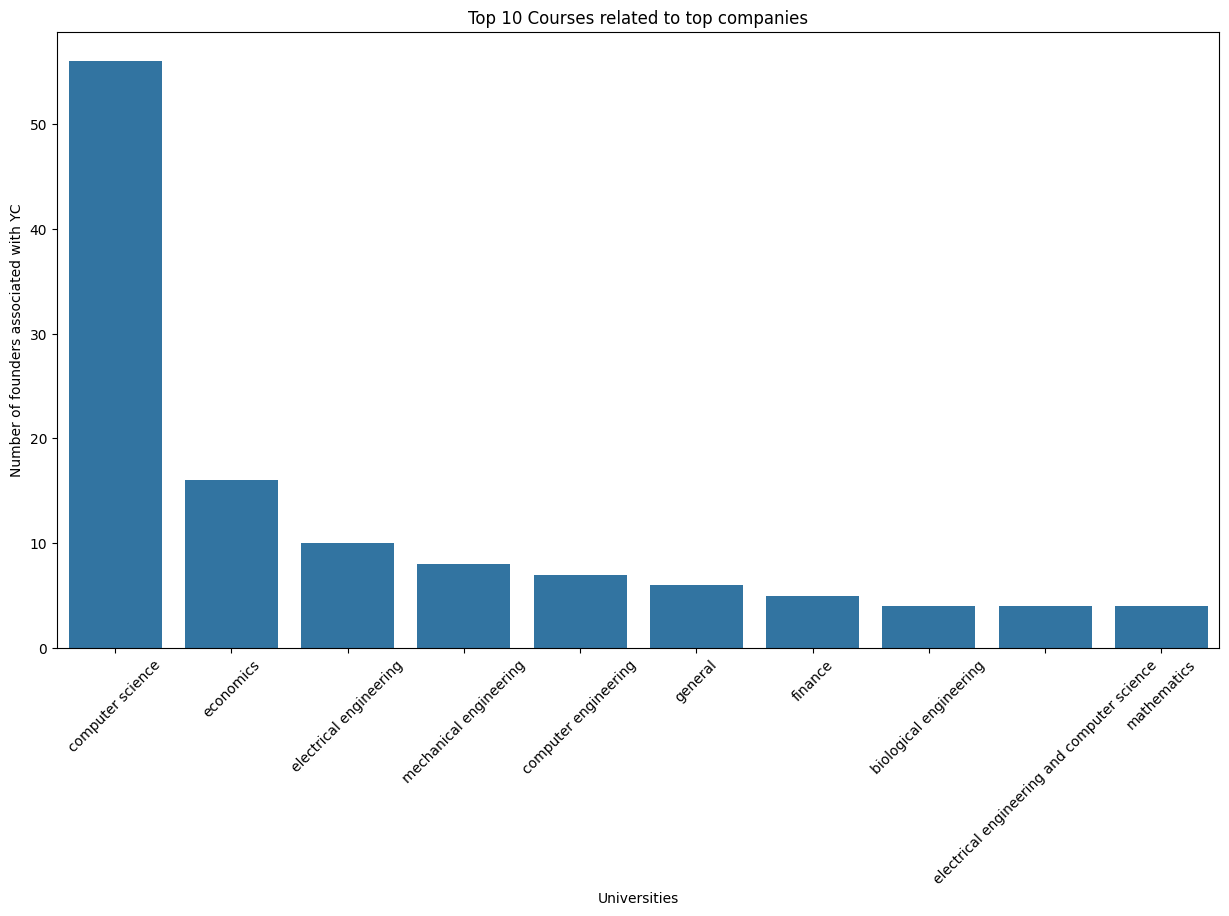

In [ ]:
all_subjects = df_top['field_of_study'].str.cat(sep=', ').split(', ')

word_counts = Counter(subject.strip().lower() for subject in all_subjects)

word_counts_df = pd.DataFrame(word_counts.items(), columns=['subject', 'count'])
word_counts_df = word_counts_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(15, 8))

sns.barplot(x='subject', y='count',data=word_counts_df.head(10))

plt.title('Top 10 Courses related to top companies')
plt.xlabel('Universities')
plt.ylabel('Number of founders associated with YC')
plt.xticks(rotation=45)
plt.show()


Analyzing the escope of top companies within YC, it's possible to notice that with the tech companies increase amount, escopes related to this area started to grow.

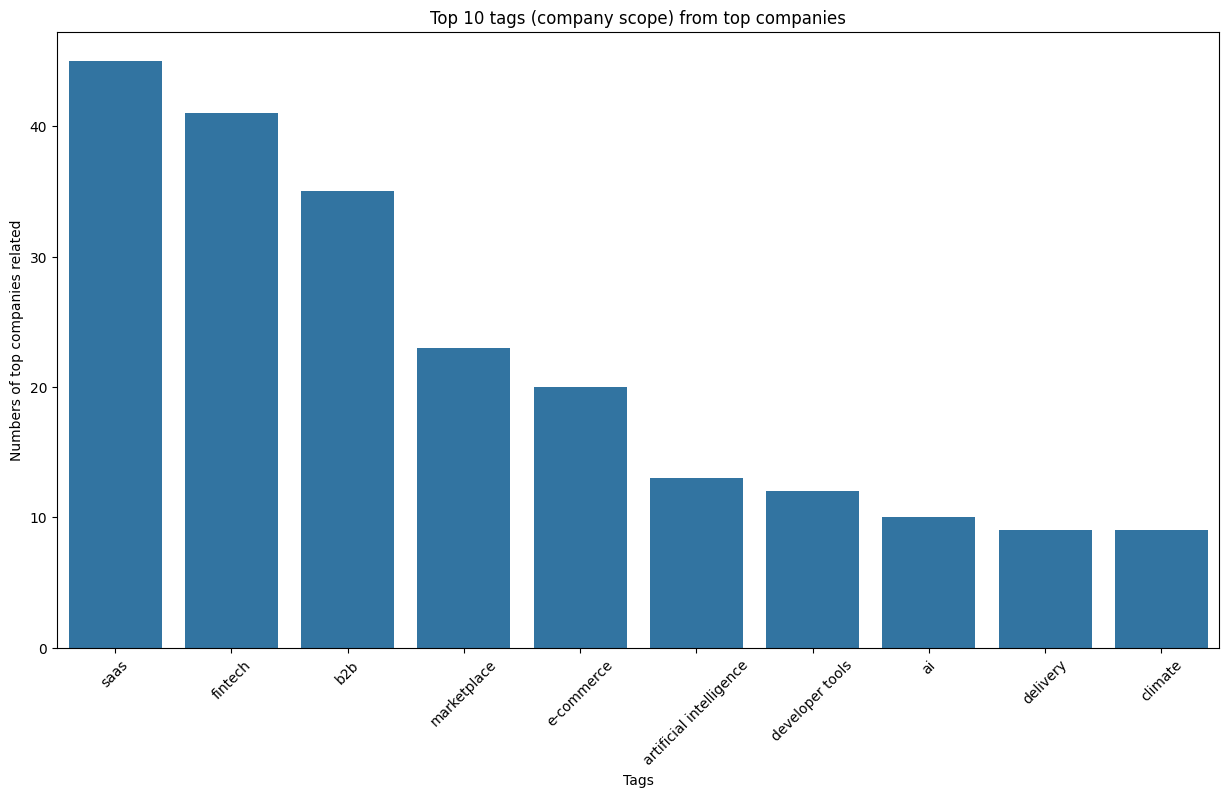

In [ ]:
all_tags = df_top['tags'].str.cat(sep=', ').split(', ')

tag_counts = Counter(tag.strip().lower() for tag in all_tags)

tag_counts_df = pd.DataFrame(tag_counts.items(), columns=['tags', 'count'])
tag_counts_df = tag_counts_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(15, 8))

sns.barplot(x='tags', y='count',data=tag_counts_df.head(10))

plt.title('Top 10 tags (company scope) from top companies')
plt.xlabel('Tags')
plt.ylabel('Numbers of top companies related')
plt.xticks(rotation=45)
plt.show()

# **Conclusion**

we can observe that most entrepreneurs joining Y Combinator come from a technology background, often with degrees from prestigious universities such as Stanford, MIT, Berkeley, among others. Additionally, the median entrepreneur has held more than two jobs and accumulated over five years of education (excluding high school).

When analyzing "Top Companies," we see a very similar background for their founders — they also predominantly hail from renowned universities and technology fields. One notable observation is that the median number of jobs held by founders of Top Companies increases to around four.

We also notice a significant gap between the number of companies that join Y Combinator and those that go on to become Top Companies, indicating that while being accepted into YC is a strong achievement, the path to reaching "top" status is much more complex.

Lastly, the final chart highlights that most Top Companies are in some way connected to technology, consistent with the trends we’ve observed in recent growth sectors.

It’s worth mentioning that I didn’t explore certain variables, such as company size or more elaborate statistical measures, which could have provided additional insights. My goal here was to focus on visualizations that generate insights into YC entrepreneurs and Top Companies.